# Setting librerie

In [3]:
import numpy as np
import xarray as xr
import seaborn as sns
import cmocean
import cartopy.crs as ccrs
from matplotlib import pyplot as plt
%matplotlib inline
%config InlinedBackend.figure_format = 'retina'
import warnings
warnings.simplefilter(action='ignore')

# Lettura dataset

In [12]:
# ! wget https://www.esrl.noaa.gov/psd/thredds/fileServer/Datasets/noaa.ersst.v5/sst.mnmean.nc
# ! gunzip sst.mnmean.nc
sst_data = xr.open_dataset('C:/Users/loren/Desktop/sst.mnmean.nc')  # https://psl.noaa.gov/repository/entry/show?entryid=cac1c2a6-a864-4409-bb77-1fdead8eeb6e
sst_data

# volendo anche cosi si può aprire il dataset
url = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/noaa.ersst.v5/sst.mnmean.nc'
ds = xr.open_dataset(url, drop_variables=['time_bnds'])

<xarray.Dataset>
Dimensions:    (lat: 89, lon: 180, time: 2019, nbnds: 2)
Coordinates:
  * lat        (lat) float32 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
  * lon        (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * time       (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2022-03-01
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) float64 ...
    sst        (time, lat, lon) float32 ...
Attributes: (12/37)
    climatology:               Climatology is based on 1971-2000 SST, Xue, Y....
    description:               In situ data: ICOADS2.5 before 2007 and NCEP i...
    keywords_vocabulary:       NASA Global Change Master Directory (GCMD) Sci...
    keywords:                  Earth Science > Oceans > Ocean Temperature > S...
    instrument:                Conventional thermometers
    source_comment:            SSTs were observed by conventional thermometer...
    ...                        ...
    creator_url_original:      https://www.ncei.noaa.gov
    license:                   No constraints on data access or use
    comment:                   SSTs were observed by conventional thermometer...
    summary:                   ERSST.v5 is developed based on v4 after revisi...
    dataset_title:             NOAA Extended Reconstructed SST V5
    data_modified:             2022-05-01

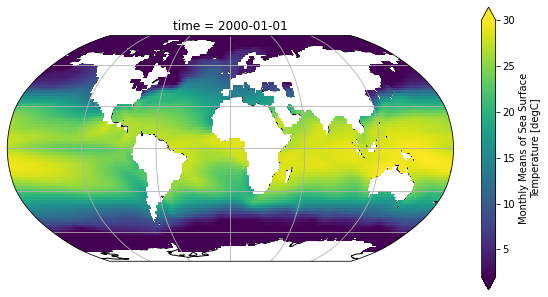

In [17]:
sst = sst_data.sst.sel(time='2000-01-01', method='nearest')
fig = plt.figure(figsize=(10,13))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()
ax.gridlines()
sst.plot(ax=ax, transform=ccrs.PlateCarree(),
         vmin=2, vmax=30, cbar_kwargs={'shrink': 0.4})

In [13]:
# ! wget https://www.esrl.noaa.gov/psd/thredds/fileServer/Datasets/noaa.oisst.v2/icec.mnmean.nc
# ! gunzip icec.mnmean.nc
icec_data = xr.open_dataset('C:/Users/loren/Desktop/icec.mnmean.nc')  # https://psl.noaa.gov/repository/entry/show?entryid=6463fdab-ecff-4ba3-acf4-3a1490d7bae0
icec_data

<xarray.Dataset>
Dimensions:    (time: 484, lat: 180, lon: 360, nbnds: 2)
Coordinates:
  * lat        (lat) float32 89.5 88.5 87.5 86.5 ... -86.5 -87.5 -88.5 -89.5
  * lon        (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time       (time) datetime64[ns] 1981-12-01 1982-01-01 ... 2022-03-01
Dimensions without coordinates: nbnds
Data variables:
    icec       (time, lat, lon) float32 ...
    time_bnds  (time, nbnds) datetime64[ns] ...
Attributes:
    title:          NOAA Optimum Interpolation (OI) SST V2
    Conventions:    CF-1.0
    history:        Wed Apr  6 13:51:42 2005: ncks -d time,0,278 SAVEs/icec.m...
    comments:       Data described in  Reynolds, R.W., N.A. Rayner, T.M.\nSmi...
    platform:       Model
    source:         NCEP Climate Modeling Branch
    institution:    National Centers for Environmental Prediction
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    NCO:            4.0.0
    dataset_title:  NOAA Optimum Interpolation (OI) SST V2
    source_url:     http://www.emc.ncep.noaa.gov/research/cmb/sst_analysis/

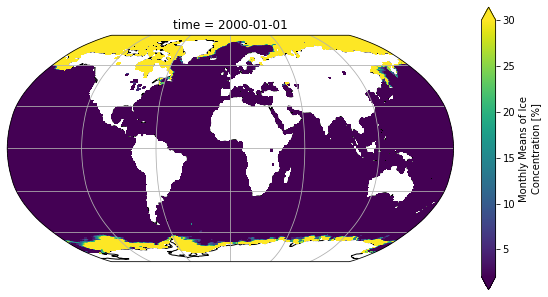

In [16]:
sst = icec_data.icec.sel(time='2000-01-01', method='nearest')
fig = plt.figure(figsize=(10,13))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()
ax.gridlines()
sst.plot(ax=ax, transform=ccrs.PlateCarree(),
         vmin=2, vmax=30, cbar_kwargs={'shrink': 0.4})

# Esplorazione dataset